## libraries

In [1]:
## libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier

# inladen data

In [2]:
df = pd.read_csv("data/competition-train(1).csv", skiprows=30)

In [3]:
display(df)

idx patiënt-id sex  leeftijd  lengte  gewicht  bovendruk  onderdruk  \
0     978  BFV2-0979   M      30.0     184       64      114.0         75   
1     806  BFV2-0807   M      48.0     169       82      127.0         82   
2    1337  BFV2-1338   M      28.0     175       58      110.0         83   
3     606  BFV2-0607   M      43.0     171       83      140.0         77   
4     701  BFV2-0702   V      48.0     175       79      125.0         77   
..    ...        ...  ..       ...     ...      ...        ...        ...   
955    92  BFV2-0093   V      32.0     160       80      122.0         90   
956   540  BFV2-0541   M      29.0     163       79       80.0         74   
957   229  BFV2-0230   V      40.0     183       74      117.0         82   
958   383  BFV2-0384   V      35.0     164       80      128.0         81   
959   825  BFV2-0826   V      39.0     181       78      119.0         75   

     tv-per-dag  beweging-per-week  slaapscore  maandinkomen  hypertensie  \
0             3                8.0   82.559178        4024.0        False   
1             5               10.0   58.244951        3546.0        False   
2             2                9.0   20.000000        3744.0        False   
3             5                9.0   72.707249        3579.0         True   
4             4                6.0   53.912941        3197.0        False   
..          ...                ...         ...           ...          ...   
955           6                9.0   59.590712        3997.0         True   
956           6                8.0   64.762643           NaN        False   
957           4                6.0   91.885641        4131.0        False   
958           5               10.0   63.835921        3363.0        False   
959           3                7.0   84.942625        3511.0        False   

           bmi     opleidingsniveau  astigmatisme    MHS  
0    18.903592        HAVO/VWO/MBO2          True  False  
1    28.710479        HAVO/VWO/MBO2          True   True  
2    18.938776        HAVO/VWO/MBO2          True  False  
3    28.384802  Basisonderwijs/MBO1          True   True  
4    25.795918  Basisonderwijs/MBO1          True  False  
..         ...                  ...           ...    ...  
955  31.250000        HAVO/VWO/MBO2          True   True  
956  29.733900        HAVO/VWO/MBO2          True  False  
957  22.096808               HBO/WO         False   True  
958  29.744200        HAVO/VWO/MBO2         False  False  
959  23.808797  Basisonderwijs/MBO1         False  False  

[960 rows x 17 columns]

In [4]:
df.columns.to_list()

['idx',
 'patiënt-id',
 'sex',
 'leeftijd',
 'lengte',
 'gewicht',
 'bovendruk',
 'onderdruk',
 'tv-per-dag',
 'beweging-per-week',
 'slaapscore',
 'maandinkomen',
 'hypertensie',
 'bmi',
 'opleidingsniveau',
 'astigmatisme',
 'MHS']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                960 non-null    int64  
 1   patiënt-id         960 non-null    object 
 2   sex                960 non-null    object 
 3   leeftijd           949 non-null    float64
 4   lengte             960 non-null    int64  
 5   gewicht            960 non-null    int64  
 6   bovendruk          912 non-null    float64
 7   onderdruk          960 non-null    int64  
 8   tv-per-dag         960 non-null    int64  
 9   beweging-per-week  938 non-null    float64
 10  slaapscore         960 non-null    float64
 11  maandinkomen       942 non-null    float64
 12  hypertensie        960 non-null    bool   
 13  bmi                947 non-null    float64
 14  opleidingsniveau   960 non-null    object 
 15  astigmatisme       960 non-null    bool   
 16  MHS                960 non

In [6]:
df.describe()

idx    leeftijd      lengte     gewicht   bovendruk  \
count   960.000000  949.000000  960.000000  960.000000  912.000000   
mean    739.593750   37.800843  173.579167   74.155208  118.980263   
std     428.617463   14.009090    8.498297    9.533754   11.702573   
min       0.000000   -8.000000  143.000000   55.000000   80.000000   
25%     374.750000   32.000000  169.000000   68.000000  112.000000   
50%     724.500000   39.000000  174.000000   74.000000  119.000000   
75%    1103.750000   47.000000  179.000000   81.000000  126.000000   
max    1499.000000   65.000000  196.000000  100.000000  148.000000   

        onderdruk  tv-per-dag  beweging-per-week  slaapscore  maandinkomen  \
count  960.000000  960.000000         938.000000  960.000000    942.000000   
mean    78.883333    3.906250           7.351812   67.970633   3982.304671   
std      5.757792    1.122136           1.873793   14.614785    359.920970   
min     58.000000    0.000000           2.000000   20.000000   2800.000000   
25%     76.000000    3.000000           6.000000   62.414559   3740.250000   
50%     79.000000    4.000000           7.000000   69.774242   3988.000000   
75%     83.000000    5.000000           9.000000   76.686194   4235.750000   
max     90.000000    7.000000          10.000000  100.000000   5050.000000   

              bmi  
count  947.000000  
mean    24.303876  
std      4.112793  
min      8.000000  
25%     21.799445  
50%     24.391059  
75%     27.084159  
max     37.807183

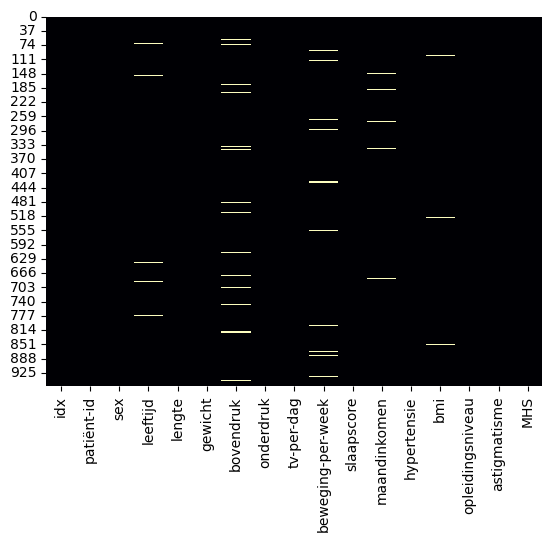

In [7]:
sns.heatmap(df.isnull(),cmap="magma",cbar=False);

picture above missng values:
- leeftijd
- bovendruk
- beweging p/week
- maandinkomen
- bmi

In [8]:
filtered_df = df[df[df.columns.to_list()].notnull().all(1)]

In [9]:
filtered_df.columns.to_list()

['idx',
 'patiënt-id',
 'sex',
 'leeftijd',
 'lengte',
 'gewicht',
 'bovendruk',
 'onderdruk',
 'tv-per-dag',
 'beweging-per-week',
 'slaapscore',
 'maandinkomen',
 'hypertensie',
 'bmi',
 'opleidingsniveau',
 'astigmatisme',
 'MHS']

In [10]:
filtered_df = filtered_df.drop("idx", axis=1)
filtered_df = filtered_df.drop("patiënt-id", axis=1)

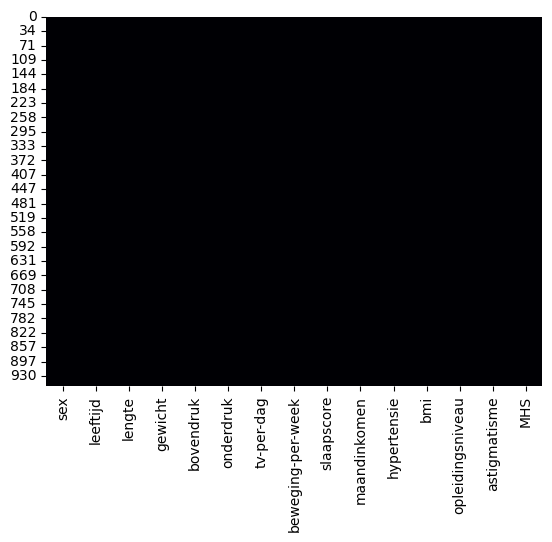

In [11]:
sns.heatmap(filtered_df.isnull(),cmap="magma",cbar=False);

all na's rows removed

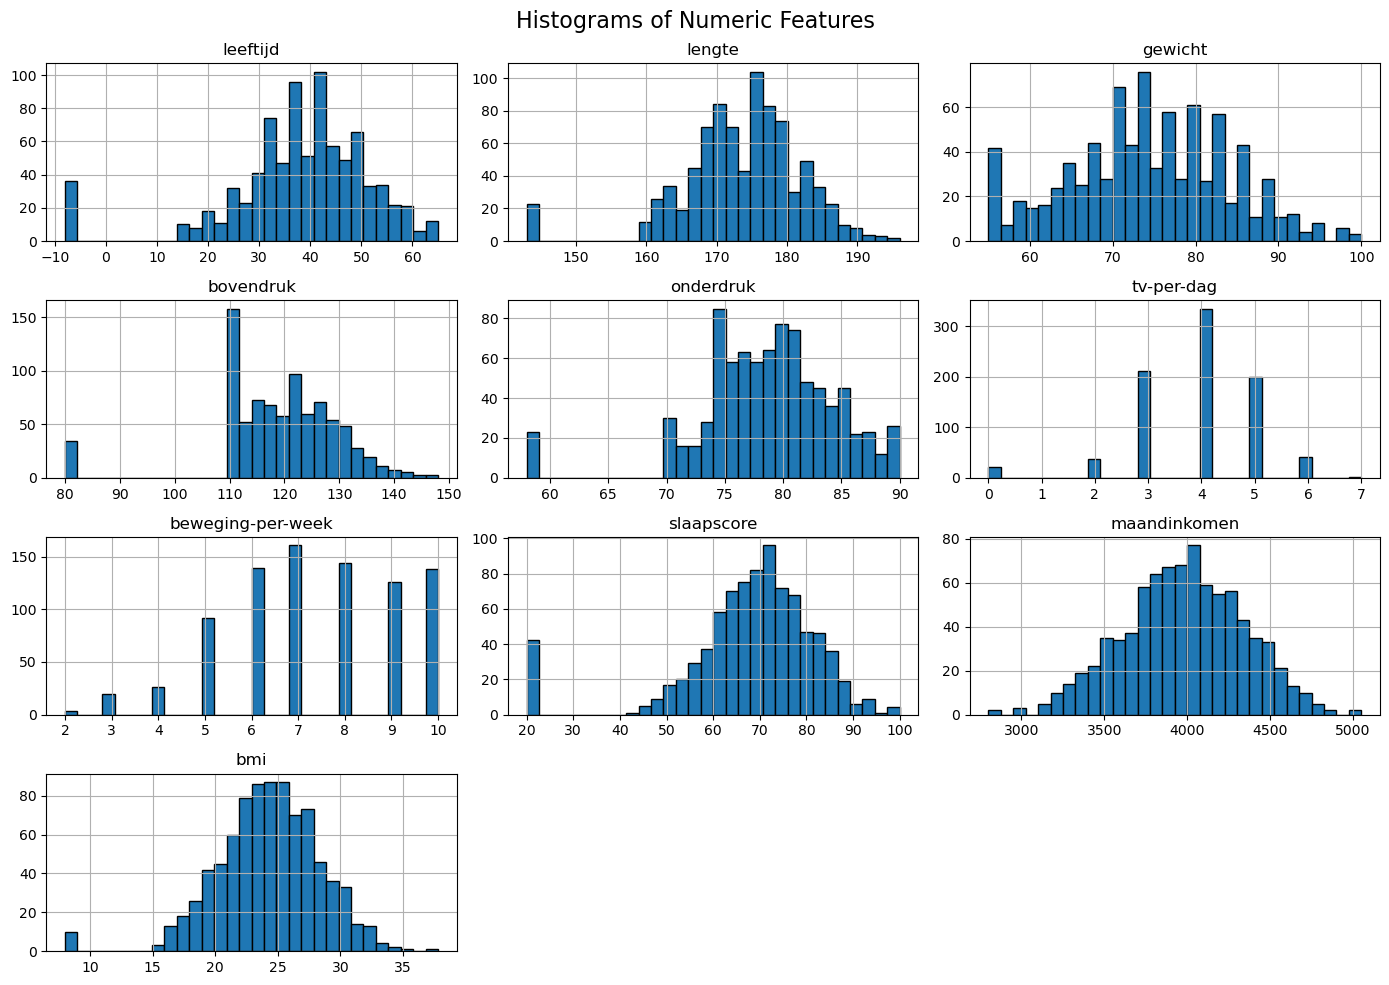

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


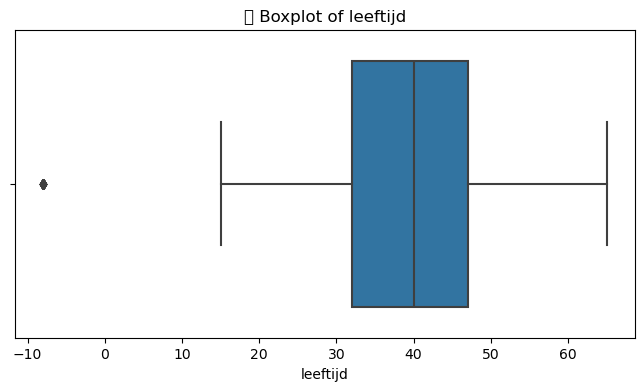

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


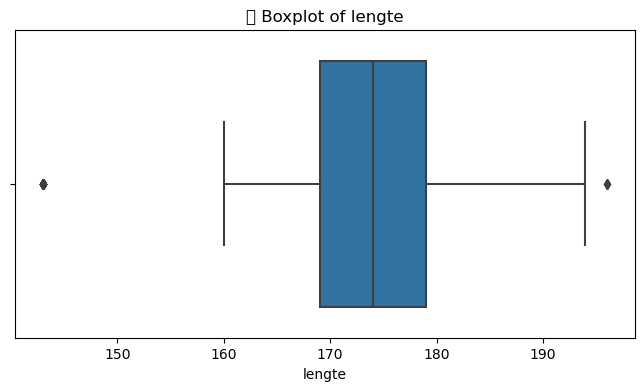

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


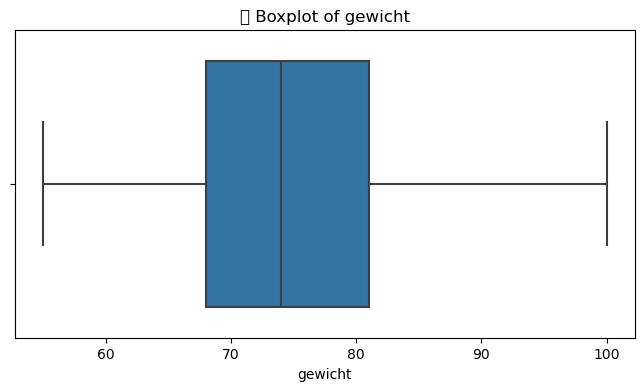

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


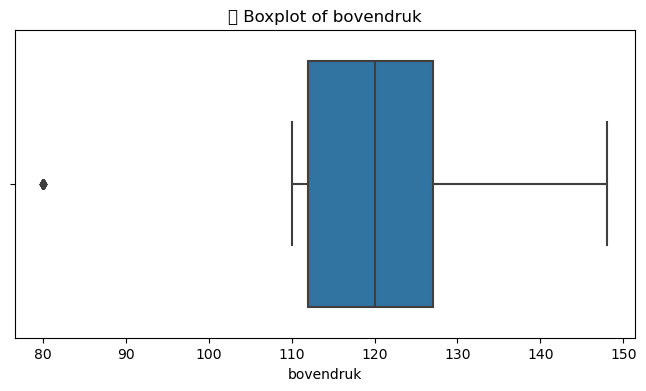

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


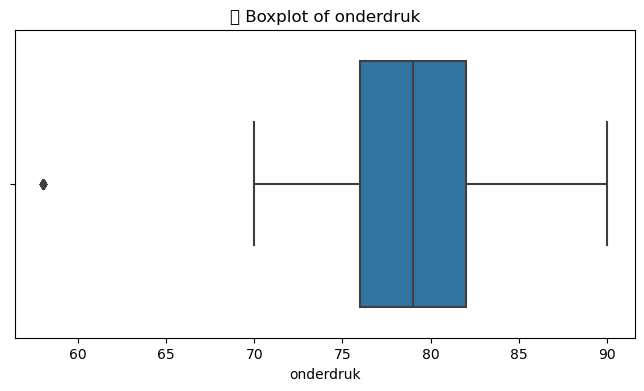

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


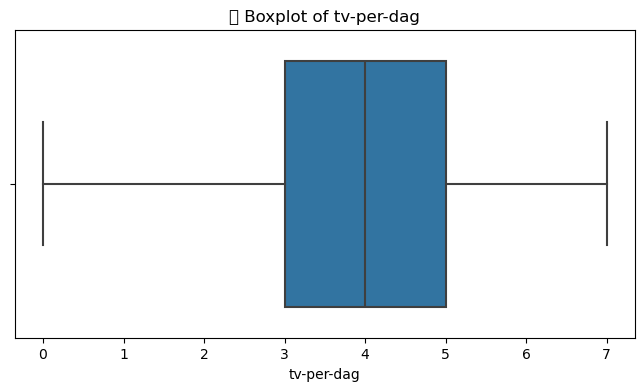

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


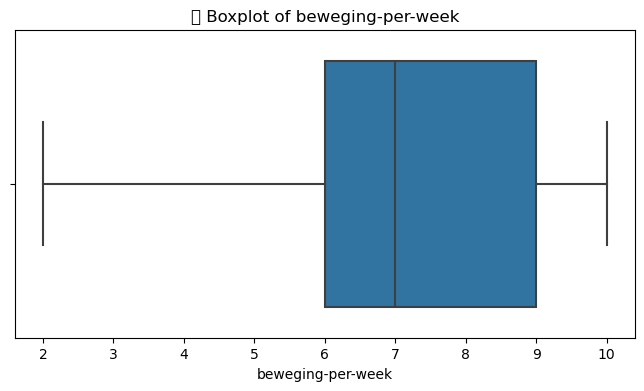

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


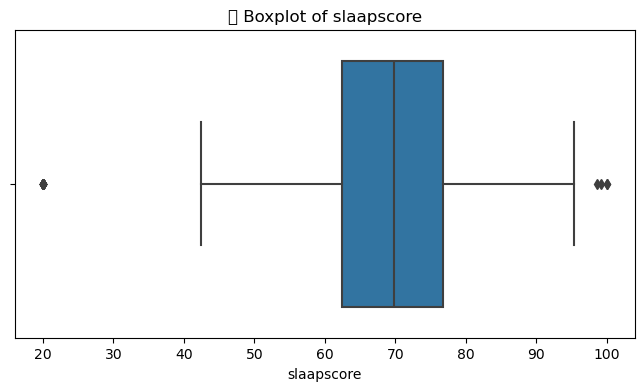

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


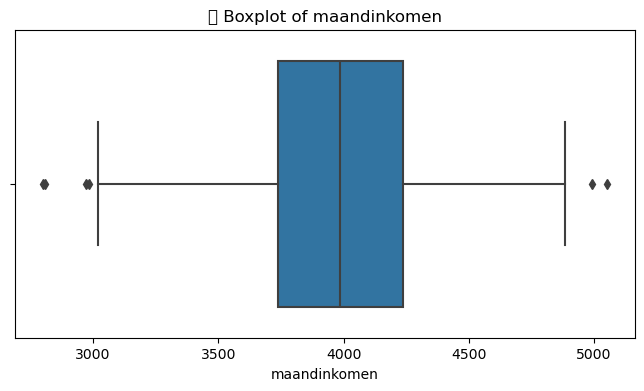

/usr/bin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


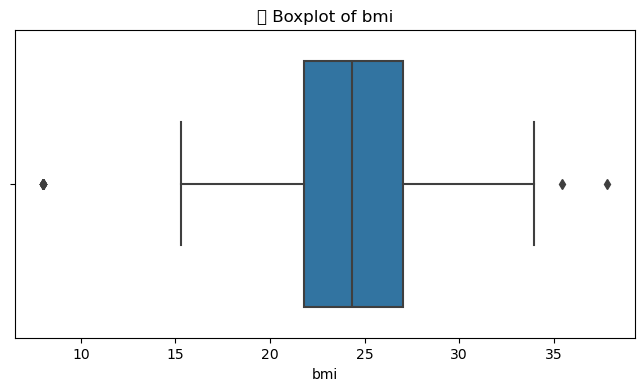

In [12]:
# Numeric features
numeric_cols = filtered_df.select_dtypes(include=np.number).columns.tolist()

# Categorical features (low cardinality)
categorical_cols = filtered_df.select_dtypes(include='object').nunique()
categorical_cols = categorical_cols[categorical_cols < 20].index.tolist()

# Histograms for numeric features
filtered_df[numeric_cols].hist(bins=30, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots for numeric features
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=filtered_df[col])
    plt.title(f"📦 Boxplot of {col}")
    plt.show()


/usr/bin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/bin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/bin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/bin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

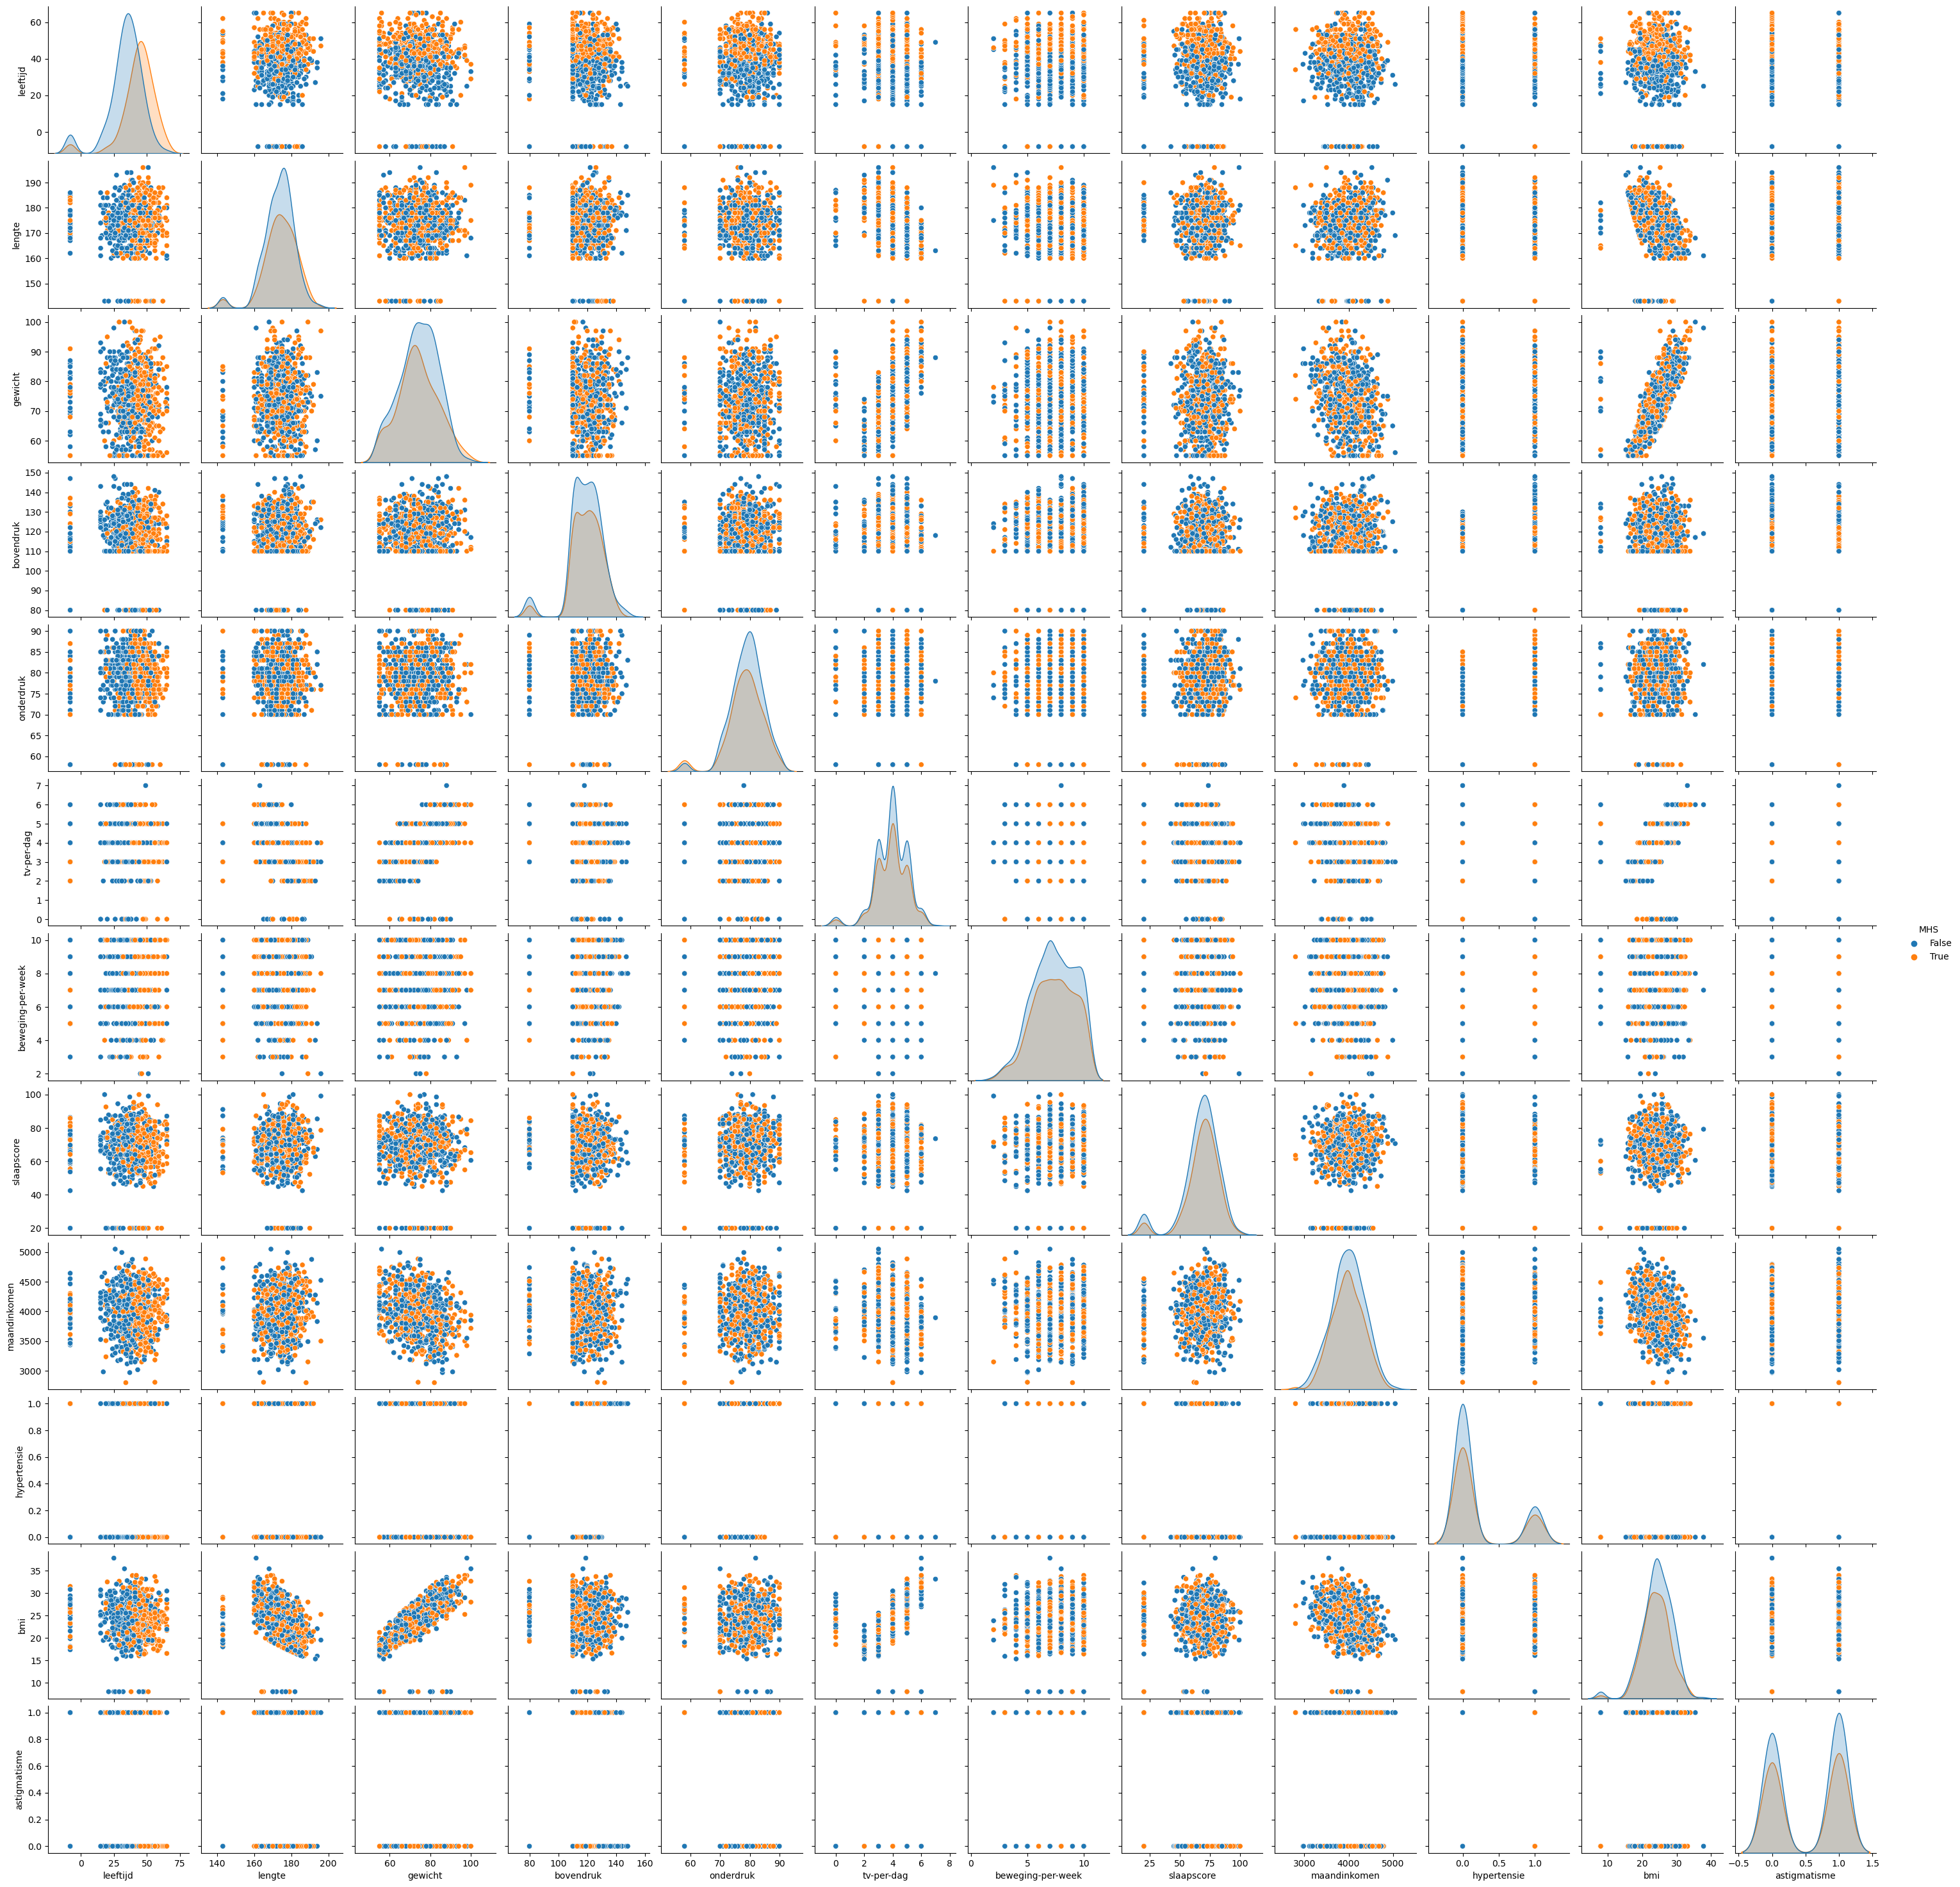

In [13]:
sns.pairplot(filtered_df, hue="MHS")
plt.show()

In [14]:

categorical_columns = filtered_df.select_dtypes(include=['object']).columns.tolist() + filtered_df.select_dtypes(include=['bool']).columns.tolist()

# Use pd.get_dummies() to one-hot encode the categorical columns
df_pandas_encoded = pd.get_dummies(filtered_df, columns=categorical_columns, drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

encoder = OneHotEncoder(sparse_output=False, drop="if_binary")

one_hot_encoded = encoder.fit_transform(filtered_df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))

df_sklearn_encoded = pd.concat([filtered_df.drop(categorical_columns, axis=1), one_hot_df], axis=1)


One-Hot Encoded Data using Pandas:
     leeftijd  lengte  gewicht  bovendruk  onderdruk  tv-per-dag  \
0        30.0     184       64      114.0         75           3   
1        48.0     169       82      127.0         82           5   
2        28.0     175       58      110.0         83           2   
3        43.0     171       83      140.0         77           5   
4        48.0     175       79      125.0         77           4   
..        ...     ...      ...        ...        ...         ...   
954      56.0     178       81      127.0         82           4   
955      32.0     160       80      122.0         90           6   
957      40.0     183       74      117.0         82           4   
958      35.0     164       80      128.0         81           5   
959      39.0     181       78      119.0         75           3   

     beweging-per-week  slaapscore  maandinkomen        bmi  sex_V  \
0                  8.0   82.559178        4024.0  18.903592  False   
1       

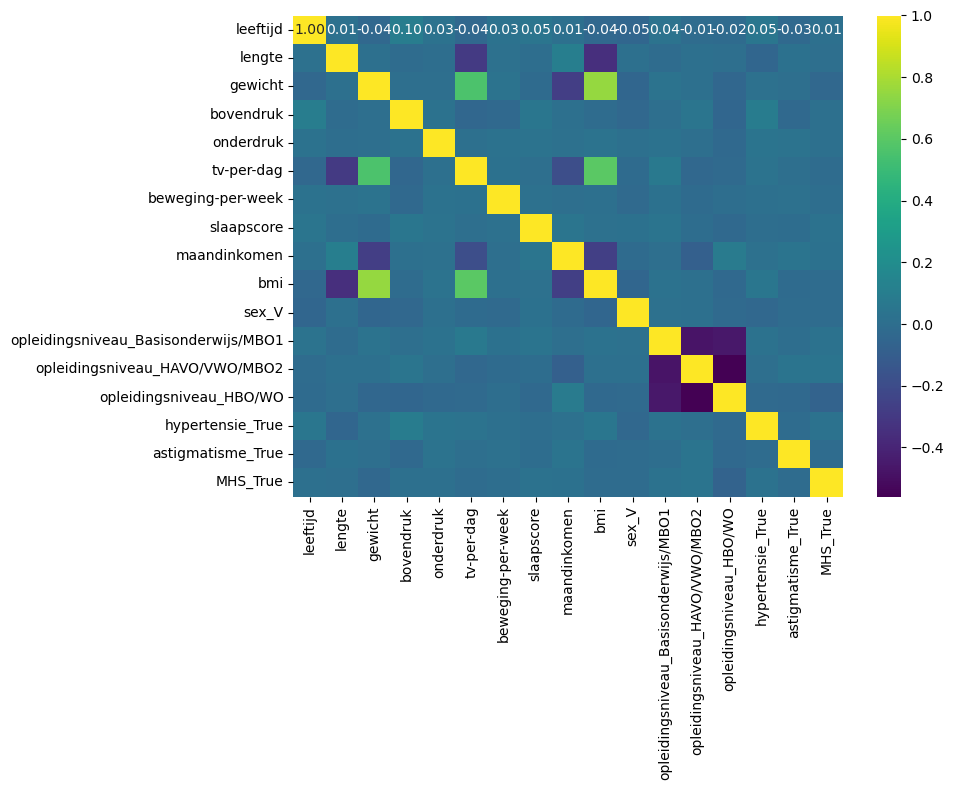

In [15]:
numeric_cols_encoded = df_sklearn_encoded.select_dtypes(include=np.number).columns.tolist()

int_features_df = df_sklearn_encoded[numeric_cols_encoded]

plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(int_features_df.corr(), cmap="viridis", annot=True, fmt=".2f")
plt.tight_layout()  # Adjust spacing
plt.show()

In [16]:
filtered_df.dtypes

sex                   object
leeftijd             float64
lengte                 int64
gewicht                int64
bovendruk            float64
onderdruk              int64
tv-per-dag             int64
beweging-per-week    float64
slaapscore           float64
maandinkomen         float64
hypertensie             bool
bmi                  float64
opleidingsniveau      object
astigmatisme            bool
MHS                     bool
dtype: object

In [17]:
print(numeric_cols_encoded)

['leeftijd', 'lengte', 'gewicht', 'bovendruk', 'onderdruk', 'tv-per-dag', 'beweging-per-week', 'slaapscore', 'maandinkomen', 'bmi', 'sex_V', 'opleidingsniveau_Basisonderwijs/MBO1', 'opleidingsniveau_HAVO/VWO/MBO2', 'opleidingsniveau_HBO/WO', 'hypertensie_True', 'astigmatisme_True', 'MHS_True']


In [18]:
filtered_df.columns.tolist()

['sex',
 'leeftijd',
 'lengte',
 'gewicht',
 'bovendruk',
 'onderdruk',
 'tv-per-dag',
 'beweging-per-week',
 'slaapscore',
 'maandinkomen',
 'hypertensie',
 'bmi',
 'opleidingsniveau',
 'astigmatisme',
 'MHS']

In [19]:
print(categorical_cols)

['sex', 'opleidingsniveau']


In [20]:
print(int_features_df.corr())

                                      leeftijd    lengte   gewicht  bovendruk  \
leeftijd                              1.000000  0.014728 -0.038075   0.097647   
lengte                                0.014728  1.000000  0.012615  -0.016460   
gewicht                              -0.038075  0.012615  1.000000   0.003368   
bovendruk                             0.097647 -0.016460  0.003368   1.000000   
onderdruk                             0.027128 -0.002973  0.001323   0.029762   
tv-per-dag                           -0.039249 -0.292500  0.557925  -0.042919   
beweging-per-week                     0.025887  0.017115  0.034068  -0.029260   
slaapscore                            0.048050  0.001176 -0.017248   0.050787   
maandinkomen                          0.008414  0.104426 -0.276958   0.012377   
bmi                                  -0.041344 -0.351951  0.754863  -0.014430   
sex_V                                -0.050798  0.009989 -0.053162  -0.040914   
opleidingsniveau_Basisonderw

In [21]:
df.dtypes

idx                    int64
patiënt-id            object
sex                   object
leeftijd             float64
lengte                 int64
gewicht                int64
bovendruk            float64
onderdruk              int64
tv-per-dag             int64
beweging-per-week    float64
slaapscore           float64
maandinkomen         float64
hypertensie             bool
bmi                  float64
opleidingsniveau      object
astigmatisme            bool
MHS                     bool
dtype: object

In [22]:
codebook = {
    "attribute": [
        "patiënt_id", "Sex", "Leeftijd", "Lengte", "Gewicht", "Bovendruk", 
        "Onderdruk", "tv-per-dag", "beweging-per-dag", "slaapscore", "maandinkomen", "hypertensie",
        "bmi", "opleidingsniveau", "astigmatisme", "MHS"
    ],
    "unit": [
        "int", "category", "float", "cm", "kg", "mmHg", 
        "mmHg", "uur", "uur", "int", "euro", "bool", 
        "bmi", "niveau", "bool", "bool"
    ],

    "dtype": [
        "object", "object", "float64", "int64", "int64", "float64", 
        "int64", "int64", "float64", "float64", "float64", "bool",
        "float64", "object", "bool", "bool"
    ],

    "description": [
        "id van de patiënt",
        "sex van de patiënt: M of V",
        "leeftijd van de patiënt",
        "Lengte van de patiënt: centimeters",
        "Gewicht van de patiënt: Kilogram",
        "Bovendruk patiënt (systolische bloeddruk) geeft de druk aan wanneer het hart zich samenknijpt: mmHg",
        "Onderdruk (diastolische bloeddruk) is de druk wanneer het hart zich ontspant: mmHg",
        "tv-per-dag:  hoeveel uren televisie de patiënt gemiddeld per dag kijkt",
        "beweging-per-dag: hoeveel uur de patiënt gemiddeld per week beweegt",
        "slaapscore: sleepscore in fitbit-data",
        "maandinkomen: in euro",
        "hypertensie: of de patiënt last heeft van hypertensie of niet",
        "bmi: body-mass-index",
        "opleidingsniveau: conform de indeling van het CBS",
        "astigmatisme: of de patiënt last heeft van astigmatisme of niet",
        "MHS: of de patiënt lijdt aan het Mary Hart Syndroom of niet"
    ]
}

pd.DataFrame(codebook).set_index("attribute")

unit    dtype  \
attribute                             
patiënt_id             int   object   
Sex               category   object   
Leeftijd             float  float64   
Lengte                  cm    int64   
Gewicht                 kg    int64   
Bovendruk             mmHg  float64   
Onderdruk             mmHg    int64   
tv-per-dag             uur    int64   
beweging-per-dag       uur  float64   
slaapscore             int  float64   
maandinkomen          euro  float64   
hypertensie           bool     bool   
bmi                    bmi  float64   
opleidingsniveau    niveau   object   
astigmatisme          bool     bool   
MHS                   bool     bool   

                                                        description  
attribute                                                            
patiënt_id                                        id van de patiënt  
Sex                                      sex van de patiënt: M of V  
Leeftijd                                    leeftijd van de patiënt  
Lengte                           Lengte van de patiënt: centimeters  
Gewicht                            Gewicht van de patiënt: Kilogram  
Bovendruk         Bovendruk patiënt (systolische bloeddruk) geef...  
Onderdruk         Onderdruk (diastolische bloeddruk) is de druk ...  
tv-per-dag        tv-per-dag:  hoeveel uren televisie de patiënt...  
beweging-per-dag  beweging-per-dag: hoeveel uur de patiënt gemid...  
slaapscore                    slaapscore: sleepscore in fitbit-data  
maandinkomen                                  maandinkomen: in euro  
hypertensie       hypertensie: of de patiënt last heeft van hype...  
bmi                                            bmi: body-mass-index  
opleidingsniveau  opleidingsniveau: conform de indeling van het CBS  
astigmatisme      astigmatisme: of de patiënt last heeft van ast...  
MHS               MHS: of de patiënt lijdt aan het Mary Hart Syn...

# imputer

In [23]:
imputing_df = df.drop("idx", axis=1).drop("patiënt-id", axis=1)


In [24]:
imputing_df.dtypes


sex                   object
leeftijd             float64
lengte                 int64
gewicht                int64
bovendruk            float64
onderdruk              int64
tv-per-dag             int64
beweging-per-week    float64
slaapscore           float64
maandinkomen         float64
hypertensie             bool
bmi                  float64
opleidingsniveau      object
astigmatisme            bool
MHS                     bool
dtype: object

In [25]:
numeric_cols = imputing_df.select_dtypes(include=['int64', 'float64']).columns
# Select categorical columns
categorical_cols = imputing_df.select_dtypes(include=['object', 'category']).columns





no booleans because they have no missing values|

In [26]:

imputing_df[numeric_cols] = SimpleImputer(strategy="mean").fit_transform(df[numeric_cols])
imputing_df[categorical_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[categorical_cols])
imputed_df = imputing_df

In [27]:

categorical_columns = imputed_df.select_dtypes(include=['object']).columns.tolist() + imputed_df.select_dtypes(include=['bool']).columns.tolist()

# Use pd.get_dummies() to one-hot encode the categorical columns
df_pandas_encoded = pd.get_dummies(imputed_df, columns=categorical_columns, drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

encoder = OneHotEncoder(sparse_output=False, drop="if_binary")

one_hot_encoded = encoder.fit_transform(imputed_df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))

df_sklearn_encoded = pd.concat([imputed_df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

One-Hot Encoded Data using Pandas:
     leeftijd  lengte  gewicht  bovendruk  onderdruk  tv-per-dag  \
0        30.0   184.0     64.0      114.0       75.0         3.0   
1        48.0   169.0     82.0      127.0       82.0         5.0   
2        28.0   175.0     58.0      110.0       83.0         2.0   
3        43.0   171.0     83.0      140.0       77.0         5.0   
4        48.0   175.0     79.0      125.0       77.0         4.0   
..        ...     ...      ...        ...        ...         ...   
955      32.0   160.0     80.0      122.0       90.0         6.0   
956      29.0   163.0     79.0       80.0       74.0         6.0   
957      40.0   183.0     74.0      117.0       82.0         4.0   
958      35.0   164.0     80.0      128.0       81.0         5.0   
959      39.0   181.0     78.0      119.0       75.0         3.0   

     beweging-per-week  slaapscore  maandinkomen        bmi  sex_V  \
0                  8.0   82.559178   4024.000000  18.903592  False   
1       

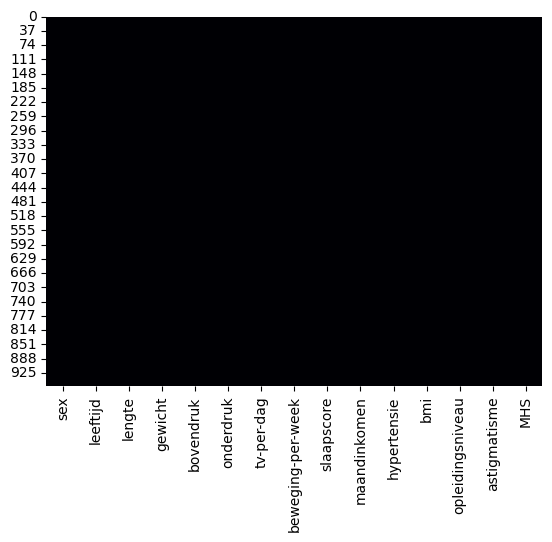

In [28]:
sns.heatmap(imputed_df.isnull(),cmap="magma",cbar=False);

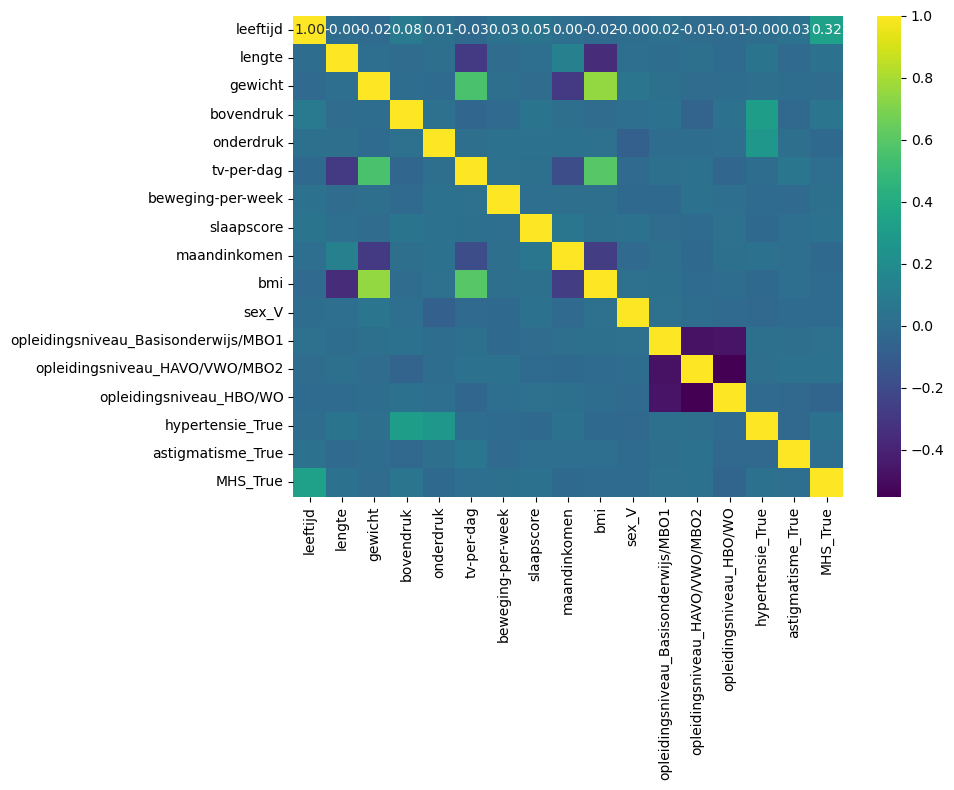

In [29]:
numeric_cols_encoded = df_sklearn_encoded.select_dtypes(include=np.number).columns.tolist()

int_features_df = df_sklearn_encoded[numeric_cols_encoded]

plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(int_features_df.corr(), cmap="viridis", annot=True, fmt=".2f")
plt.tight_layout()  # Adjust spacing
plt.show()

In [30]:
MHS_cor = pd.DataFrame(int_features_df.corr()["MHS_True"])

In [31]:
low_cor_filter = MHS_cor["MHS_True"].abs() > 0.025
filtered_cor = MHS_cor[low_cor_filter]

In [32]:
type (MHS_cor)

pandas.core.frame.DataFrame

In [33]:
col_keep = MHS_cor.index[low_cor_filter]

In [34]:
display(MHS_cor)

MHS_True
leeftijd                              0.323237
lengte                                0.025604
gewicht                              -0.011186
bovendruk                             0.053791
onderdruk                            -0.023864
tv-per-dag                            0.002049
beweging-per-week                     0.013073
slaapscore                            0.025071
maandinkomen                         -0.028678
bmi                                  -0.017534
sex_V                                -0.013269
opleidingsniveau_Basisonderwijs/MBO1  0.019662
opleidingsniveau_HAVO/VWO/MBO2        0.029891
opleidingsniveau_HBO/WO              -0.048891
hypertensie_True                      0.027756
astigmatisme_True                     0.001251
MHS_True                              1.000000

In [35]:
print(col_keep)

Index(['leeftijd', 'lengte', 'bovendruk', 'slaapscore', 'maandinkomen',
       'opleidingsniveau_HAVO/VWO/MBO2', 'opleidingsniveau_HBO/WO',
       'hypertensie_True', 'MHS_True'],
      dtype='object')


In [36]:
imputed_df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['sex', 'leeftijd', 'lengte', 'gewicht', 'bovendruk', 'onderdruk',
       'tv-per-dag', 'beweging-per-week', 'slaapscore', 'maandinkomen',
       'hypertensie', 'bmi', 'opleidingsniveau', 'astigmatisme', 'MHS'],
      dtype='object')>

In [37]:
display(low_cor_filter)

leeftijd                                 True
lengte                                   True
gewicht                                 False
bovendruk                                True
onderdruk                               False
tv-per-dag                              False
beweging-per-week                       False
slaapscore                               True
maandinkomen                             True
bmi                                     False
sex_V                                   False
opleidingsniveau_Basisonderwijs/MBO1    False
opleidingsniveau_HAVO/VWO/MBO2           True
opleidingsniveau_HBO/WO                  True
hypertensie_True                         True
astigmatisme_True                       False
MHS_True                                 True
Name: MHS_True, dtype: bool

In [38]:
display(filtered_cor)

MHS_True
leeftijd                        0.323237
lengte                          0.025604
bovendruk                       0.053791
slaapscore                      0.025071
maandinkomen                   -0.028678
opleidingsniveau_HAVO/VWO/MBO2  0.029891
opleidingsniveau_HBO/WO        -0.048891
hypertensie_True                0.027756
MHS_True                        1.000000

In [39]:
target_correlations = MHS_cor['MHS_True']
significant_features = target_correlations[target_correlations > 0.025].index.tolist()


In [40]:
df_sklearn_encoded = df_sklearn_encoded[col_keep]


In [41]:
df_sklearn_encoded

leeftijd  lengte  bovendruk  slaapscore  maandinkomen  \
0        30.0   184.0      114.0   82.559178   4024.000000   
1        48.0   169.0      127.0   58.244951   3546.000000   
2        28.0   175.0      110.0   20.000000   3744.000000   
3        43.0   171.0      140.0   72.707249   3579.000000   
4        48.0   175.0      125.0   53.912941   3197.000000   
..        ...     ...        ...         ...           ...   
955      32.0   160.0      122.0   59.590712   3997.000000   
956      29.0   163.0       80.0   64.762643   3982.304671   
957      40.0   183.0      117.0   91.885641   4131.000000   
958      35.0   164.0      128.0   63.835921   3363.000000   
959      39.0   181.0      119.0   84.942625   3511.000000   

     opleidingsniveau_HAVO/VWO/MBO2  opleidingsniveau_HBO/WO  \
0                               1.0                      0.0   
1                               1.0                      0.0   
2                               1.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   
..                              ...                      ...   
955                             1.0                      0.0   
956                             1.0                      0.0   
957                             0.0                      1.0   
958                             1.0                      0.0   
959                             0.0                      0.0   

     hypertensie_True  MHS_True  
0                 0.0       0.0  
1                 0.0       1.0  
2                 0.0       0.0  
3                 1.0       1.0  
4                 0.0       0.0  
..                ...       ...  
955               1.0       1.0  
956               0.0       0.0  
957               0.0       1.0  
958               0.0       0.0  
959               0.0       0.0  

[960 rows x 9 columns]

In [42]:
from sklearn.datasets import load_iris

In [43]:
iris = load_iris()
display(iris.data)
display

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

In [44]:
df_sklearn_encoded.columns.to_list()

['leeftijd',
 'lengte',
 'bovendruk',
 'slaapscore',
 'maandinkomen',
 'opleidingsniveau_HAVO/VWO/MBO2',
 'opleidingsniveau_HBO/WO',
 'hypertensie_True',
 'MHS_True']

In [45]:
X = df_sklearn_encoded.drop("MHS_True", axis=1)
y = df_sklearn_encoded["MHS_True"]

In [47]:
display(df_sklearn_encoded)

leeftijd  lengte  bovendruk  slaapscore  maandinkomen  \
0        30.0   184.0      114.0   82.559178   4024.000000   
1        48.0   169.0      127.0   58.244951   3546.000000   
2        28.0   175.0      110.0   20.000000   3744.000000   
3        43.0   171.0      140.0   72.707249   3579.000000   
4        48.0   175.0      125.0   53.912941   3197.000000   
..        ...     ...        ...         ...           ...   
955      32.0   160.0      122.0   59.590712   3997.000000   
956      29.0   163.0       80.0   64.762643   3982.304671   
957      40.0   183.0      117.0   91.885641   4131.000000   
958      35.0   164.0      128.0   63.835921   3363.000000   
959      39.0   181.0      119.0   84.942625   3511.000000   

     opleidingsniveau_HAVO/VWO/MBO2  opleidingsniveau_HBO/WO  \
0                               1.0                      0.0   
1                               1.0                      0.0   
2                               1.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   
..                              ...                      ...   
955                             1.0                      0.0   
956                             1.0                      0.0   
957                             0.0                      1.0   
958                             1.0                      0.0   
959                             0.0                      0.0   

     hypertensie_True  MHS_True  
0                 0.0       0.0  
1                 0.0       1.0  
2                 0.0       0.0  
3                 1.0       1.0  
4                 0.0       0.0  
..                ...       ...  
955               1.0       1.0  
956               0.0       0.0  
957               0.0       1.0  
958               0.0       0.0  
959               0.0       0.0  

[960 rows x 9 columns]

In [55]:
numeric_cols = df_sklearn_encoded.select_dtypes(include=np.number).columns.tolist()#[:-1]

print(numeric_cols)

['leeftijd', 'lengte', 'bovendruk', 'slaapscore', 'maandinkomen', 'opleidingsniveau_HAVO/VWO/MBO2', 'opleidingsniveau_HBO/WO', 'hypertensie_True', 'MHS_True']


In [59]:
X = df_sklearn_encoded.drop("MHS_True", axis=1)
y = df_sklearn_encoded["MHS_True"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_cols = df_sklearn_encoded.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = df_sklearn_encoded.select_dtypes(include=["object","category"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])



dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier()),
])


dt_pipeline.fit(X_train, y_train)


y_pred_dt = dt_pipeline.predict(X_test)


print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Confusion Matrix:
[[63 46]
 [33 50]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.58      0.61       109
         1.0       0.52      0.60      0.56        83

    accuracy                           0.59       192
   macro avg       0.59      0.59      0.59       192
weighted avg       0.60      0.59      0.59       192



In [ ]:
X = df_sklearn_encoded.drop("MHS_True", axis=1)
y = df_sklearn_encoded["MHS_True"]

numeric_cols = df_sklearn_encoded.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_sklearn_encoded.select_dtypes(include=["object","category"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(probability=True))  
])


svm_params = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf"],
    "classifier__gamma": ["scale", "auto"]
}


svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring="accuracy")
svm_grid.fit(X_train, y_train)


y_pred_svm = svm_grid.predict(X_test)
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))



dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", tree.DecisionTreeClassifier()),
])


dt_pipeline.fit(X_train, y_train)


y_pred_dt = dt_pipeline.predict(X_test)


print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

ValueError: A given column is not a column of the dataframe